In [2]:


# !pip install tensorflow

In [3]:
# !pip install keras

In [1]:
# !pip install --upgrade tensorflow
# !pip show tensorflow
# # !pip install tensorflow-intel

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.framework import ops
import random
import cv2
import os
import numpy as np
from random import shuffle
from tqdm import tqdm
from tensorflow.keras import backend as K
# from tensorflow.python.framework import ops
# Visualize training history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import optimizers

In [5]:

train_dir = "D:/dummy/Project/codes/Train_data"
test_dir = "D:/dummy/Project/codes/Test_data"

In [6]:
from keras.models import load_model
import os

LR = 1e-3     
# (LR is a constant representing the learning rate, set to 1e-3 (0.001).)
MODEL_NAME = 'Lungdisease-{}-{}'.format(LR, '2conv-basic')


In [7]:



def label_img(img):           # The function assumes that img is a string, and it extracts the first character of the string (img[0]).
    word_label = img[0]   #Based on the value of this first character,  If the first character of img is ’a’, the function prints ’Cancer’ and returns the one-hot encoding [1, 0, 0, 0, 0].

    print(word_label)
  
    if word_label == 'a':
        print('Cancer')
        return [1,0,0,0,0]
    
    elif word_label == 'b':
        print(' Viral Pneumonia')
        return [0,1,0,0,0]
    
    elif word_label == 'c':
        print('Covid ')
        return [0,0,1,0,0]
    
    elif word_label == 't':
        print('Tuberculosis ')
        return [0,0,0,1,0]
    
    elif word_label == 'n':
        print('Normal ')
        return [0,0,0,0,1]

In [8]:
file_path = "D:/dummy/Project/codes/Train_data"

CLAHE Image saved as output.png


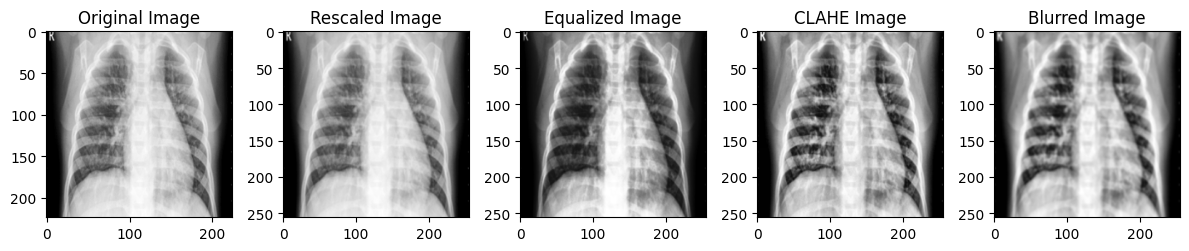

In [9]:
# !pip install matplotlib

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread("D:/dummy/Project/codes/Train_data/b (58).png", cv2.IMREAD_GRAYSCALE)

# Image Rescaling
rescaled_image = cv2.resize(image, (256, 256))  # Specify the new dimensions

# Histogram Equalization to enhance the contrast of an image by redistributing the intensity values
equalized_image = cv2.equalizeHist(rescaled_image)

# Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Improve contrast in local regions.
clahe_image = clahe.apply(rescaled_image)

# Noise Reduction using Gaussian Blur
blurred_image = cv2.GaussianBlur(clahe_image, (5, 5), 0)  # Adjust the kernel size as needed

# Display the original and processed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 5, 2)
plt.title('Rescaled Image')
plt.imshow(rescaled_image, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')

plt.subplot(1, 5, 4)
plt.title('CLAHE Image')
plt.imshow(clahe_image, cmap='gray')

plt.subplot(1, 5, 5)
plt.title('Blurred Image')
plt.imshow(blurred_image, cmap='gray')

plt.tight_layout()

# Save the CLAHE Image
output_filename = 'output.png'
cv2.imwrite(output_filename, clahe_image)
print(f'CLAHE Image saved as {output_filename}')

plt.show()


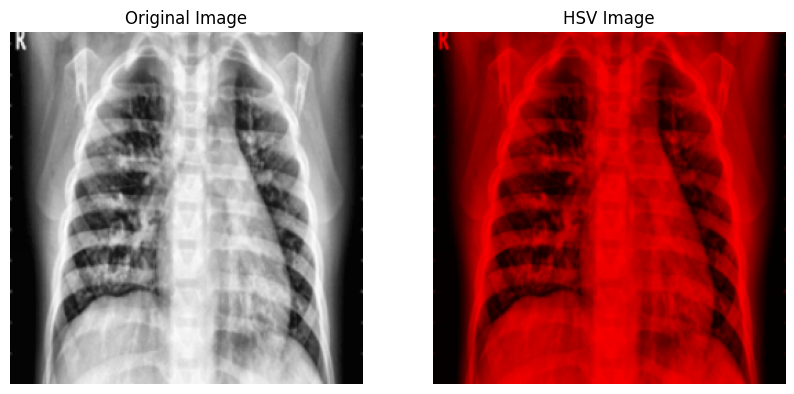

In [10]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread('output.png')

# Convert the original image to HSV(Hue, Saturation, Value)
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

# Save the HSV image
cv2.imwrite('output_hsv.png', hsv_image) #By converting to HSV, you can perform various image processing tasks more effectively

# Display both images using matplotlib
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display the HSV image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_BGR2RGB))
plt.title('HSV Image')
plt.axis('off')

plt.show()


In [11]:

IMG_SIZE = 50

def create_train_data():
    training_data = []  #Initializes an empty list to store the training data.
    for img in tqdm(os.listdir(train_dir)):
        label = label_img(img)
        path = os.path.join(train_dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])

    shuffle(training_data)
    return training_data

def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(test_dir)):
        path = os.path.join(test_dir, img)
        img_num = img.split('.')[0]
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), img_num])

    shuffle(testing_data)
    return testing_data

# Create and save training and testing data
train_data = create_train_data()
test_data = process_test_data()

# Separate images and labels
train_images = np.array([item[0] for item in train_data])
train_labels = np.array([item[1] for item in train_data])

test_images = np.array([item[0] for item in test_data])
test_labels = np.array([item[1] for item in test_data])

# Save NumPy arrays
np.save('train_images.npy', train_images)
np.save('train_labels.npy', train_labels)
np.save('test_images.npy', test_images)
np.save('test_labels.npy', test_labels)


  0%|          | 5/2716 [00:00<01:41, 26.74it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  0%|          | 8/2716 [00:00<01:43, 26.18it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  1%|          | 17/2716 [00:00<01:24, 32.06it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  1%|          | 21/2716 [00:00<01:56, 23.16it/s]

a
Cancer
a
Cancer
a
Cancer


  1%|          | 24/2716 [00:01<02:19, 19.33it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer


  1%|          | 28/2716 [00:01<02:00, 22.39it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  1%|▏         | 34/2716 [00:01<01:56, 22.99it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  1%|▏         | 40/2716 [00:01<01:59, 22.42it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  2%|▏         | 49/2716 [00:01<01:37, 27.43it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  2%|▏         | 54/2716 [00:02<01:22, 32.22it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  2%|▏         | 64/2716 [00:02<01:13, 35.94it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  3%|▎         | 78/2716 [00:02<01:00, 43.26it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  3%|▎         | 88/2716 [00:02<01:08, 38.39it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  4%|▎         | 96/2716 [00:03<01:02, 41.72it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  4%|▍         | 107/2716 [00:03<01:00, 43.18it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  4%|▍         | 113/2716 [00:03<00:55, 46.66it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  4%|▍         | 118/2716 [00:03<01:33, 27.82it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  5%|▍         | 126/2716 [00:04<01:35, 27.25it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  5%|▍         | 131/2716 [00:04<01:23, 30.99it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  5%|▌         | 140/2716 [00:04<01:17, 33.21it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  5%|▌         | 147/2716 [00:04<01:05, 39.40it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  6%|▌         | 157/2716 [00:04<01:09, 36.81it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  6%|▌         | 165/2716 [00:05<01:20, 31.80it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  6%|▋         | 176/2716 [00:05<01:05, 38.98it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  7%|▋         | 188/2716 [00:05<01:08, 37.08it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  7%|▋         | 195/2716 [00:05<00:58, 42.80it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  8%|▊         | 205/2716 [00:06<01:06, 37.54it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  8%|▊         | 215/2716 [00:06<01:01, 40.75it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  8%|▊         | 227/2716 [00:06<00:58, 42.64it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  9%|▉         | 239/2716 [00:06<00:51, 48.33it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  9%|▉         | 244/2716 [00:07<01:05, 37.97it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


  9%|▉         | 255/2716 [00:07<01:07, 36.25it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 10%|▉         | 259/2716 [00:07<01:31, 26.83it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer


 10%|▉         | 263/2716 [00:07<01:25, 28.62it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 10%|█         | 280/2716 [00:08<00:56, 43.26it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 11%|█         | 292/2716 [00:08<00:49, 48.66it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 11%|█         | 298/2716 [00:08<00:52, 46.20it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 11%|█▏        | 310/2716 [00:08<00:55, 43.14it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 12%|█▏        | 315/2716 [00:08<00:56, 42.27it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 12%|█▏        | 320/2716 [00:09<01:22, 29.02it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 12%|█▏        | 332/2716 [00:09<01:26, 27.56it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 12%|█▏        | 336/2716 [00:09<01:25, 27.94it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer


 13%|█▎        | 348/2716 [00:10<01:13, 32.18it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 13%|█▎        | 356/2716 [00:10<01:17, 30.60it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 13%|█▎        | 362/2716 [00:10<01:10, 33.42it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 14%|█▎        | 371/2716 [00:10<01:10, 33.45it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 14%|█▍        | 381/2716 [00:11<01:02, 37.59it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 14%|█▍        | 387/2716 [00:11<00:54, 42.93it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 15%|█▍        | 400/2716 [00:11<00:56, 40.81it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 15%|█▍        | 405/2716 [00:11<00:55, 41.38it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 15%|█▌        | 415/2716 [00:12<00:56, 40.49it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 15%|█▌        | 420/2716 [00:12<01:04, 35.42it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 16%|█▌        | 431/2716 [00:12<01:00, 37.83it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 16%|█▌        | 435/2716 [00:12<01:00, 37.51it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 17%|█▋        | 449/2716 [00:12<00:50, 44.52it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 17%|█▋        | 460/2716 [00:13<00:49, 45.81it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 17%|█▋        | 473/2716 [00:13<00:46, 48.55it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 18%|█▊        | 479/2716 [00:13<00:45, 49.37it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 18%|█▊        | 484/2716 [00:13<00:56, 39.49it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 18%|█▊        | 495/2716 [00:13<00:50, 44.27it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer
a
Cancer


 19%|█▊        | 508/2716 [00:14<00:45, 48.44it/s]

a
Cancer
a
Cancer
a
Cancer
a
Cancer
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 19%|█▉        | 513/2716 [00:14<01:00, 36.61it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia


 19%|█▉        | 520/2716 [00:14<00:55, 39.54it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 20%|█▉        | 533/2716 [00:14<00:47, 45.99it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 20%|█▉        | 538/2716 [00:14<00:53, 40.43it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 20%|██        | 548/2716 [00:15<00:59, 36.18it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 20%|██        | 553/2716 [00:15<00:55, 39.23it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 21%|██        | 564/2716 [00:15<00:49, 43.40it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 21%|██        | 569/2716 [00:15<00:57, 37.14it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 21%|██▏       | 578/2716 [00:16<01:06, 32.12it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 22%|██▏       | 588/2716 [00:16<00:58, 36.61it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 22%|██▏       | 593/2716 [00:16<00:54, 39.31it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 22%|██▏       | 604/2716 [00:16<00:57, 36.90it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 23%|██▎       | 613/2716 [00:16<00:53, 39.11it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 23%|██▎       | 618/2716 [00:17<01:04, 32.61it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 23%|██▎       | 629/2716 [00:17<00:55, 37.37it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 23%|██▎       | 638/2716 [00:17<00:54, 38.14it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 24%|██▍       | 649/2716 [00:17<00:46, 44.10it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 24%|██▍       | 659/2716 [00:18<00:48, 42.72it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 25%|██▍       | 672/2716 [00:18<00:42, 47.90it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 25%|██▍       | 677/2716 [00:18<00:47, 42.69it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 25%|██▌       | 691/2716 [00:18<00:39, 50.93it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 26%|██▌       | 703/2716 [00:18<00:37, 53.44it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 26%|██▋       | 719/2716 [00:19<00:31, 62.50it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 27%|██▋       | 734/2716 [00:19<00:30, 65.34it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 27%|██▋       | 741/2716 [00:19<00:31, 63.19it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 28%|██▊       | 755/2716 [00:19<00:38, 51.07it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 28%|██▊       | 764/2716 [00:19<00:33, 58.27it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 29%|██▊       | 780/2716 [00:20<00:29, 65.18it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 29%|██▉       | 796/2716 [00:20<00:31, 61.05it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 30%|██▉       | 803/2716 [00:20<00:30, 63.21it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 30%|███       | 820/2716 [00:20<00:27, 68.01it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 31%|███       | 837/2716 [00:21<00:25, 74.49it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 32%|███▏      | 856/2716 [00:21<00:24, 75.49it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 32%|███▏      | 872/2716 [00:21<00:24, 74.54it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 32%|███▏      | 880/2716 [00:21<00:26, 69.22it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 33%|███▎      | 897/2716 [00:21<00:26, 68.41it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 33%|███▎      | 904/2716 [00:21<00:27, 64.78it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 34%|███▍      | 917/2716 [00:22<00:36, 49.26it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 34%|███▍      | 923/2716 [00:22<00:50, 35.70it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 35%|███▍      | 945/2716 [00:22<00:32, 54.04it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 35%|███▌      | 954/2716 [00:23<00:28, 62.19it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 36%|███▌      | 969/2716 [00:23<00:42, 40.87it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 36%|███▋      | 986/2716 [00:23<00:34, 50.72it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 37%|███▋      | 1000/2716 [00:24<00:29, 58.25it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia


 37%|███▋      | 1007/2716 [00:24<00:31, 54.19it/s]

b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
b
 Viral Pneumonia
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 38%|███▊      | 1021/2716 [00:24<00:30, 55.44it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 38%|███▊      | 1039/2716 [00:24<00:25, 64.79it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 39%|███▊      | 1046/2716 [00:24<00:27, 60.02it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 39%|███▉      | 1060/2716 [00:25<00:29, 56.98it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 39%|███▉      | 1068/2716 [00:25<00:27, 59.94it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 40%|███▉      | 1077/2716 [00:25<00:24, 66.31it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 40%|████      | 1091/2716 [00:25<00:31, 51.89it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 41%|████      | 1106/2716 [00:25<00:27, 58.88it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 41%|████▏     | 1123/2716 [00:26<00:25, 63.48it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 42%|████▏     | 1137/2716 [00:26<00:27, 57.09it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 43%|████▎     | 1156/2716 [00:26<00:23, 67.62it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 43%|████▎     | 1171/2716 [00:26<00:22, 67.48it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 43%|████▎     | 1180/2716 [00:27<00:21, 70.02it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 44%|████▍     | 1196/2716 [00:27<00:23, 64.32it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 45%|████▍     | 1216/2716 [00:27<00:21, 69.38it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 45%|████▌     | 1224/2716 [00:27<00:25, 58.02it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 45%|████▌     | 1231/2716 [00:27<00:25, 59.30it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 46%|████▌     | 1245/2716 [00:28<00:29, 50.38it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 46%|████▌     | 1251/2716 [00:28<00:32, 44.67it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 46%|████▌     | 1256/2716 [00:28<00:35, 41.15it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 47%|████▋     | 1267/2716 [00:28<00:33, 43.55it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 47%|████▋     | 1272/2716 [00:28<00:36, 40.07it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 47%|████▋     | 1282/2716 [00:29<00:37, 38.68it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 48%|████▊     | 1293/2716 [00:29<00:33, 42.28it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 48%|████▊     | 1306/2716 [00:29<00:28, 48.85it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 48%|████▊     | 1311/2716 [00:29<00:29, 48.37it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 49%|████▊     | 1322/2716 [00:30<00:31, 44.64it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 49%|████▉     | 1336/2716 [00:30<00:27, 50.98it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 50%|████▉     | 1353/2716 [00:30<00:22, 61.93it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 50%|█████     | 1368/2716 [00:30<00:21, 61.80it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 51%|█████     | 1383/2716 [00:30<00:19, 66.92it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 51%|█████▏    | 1392/2716 [00:31<00:18, 70.57it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 52%|█████▏    | 1407/2716 [00:31<00:21, 61.73it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 52%|█████▏    | 1414/2716 [00:31<00:21, 59.37it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 53%|█████▎    | 1428/2716 [00:31<00:20, 61.95it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 53%|█████▎    | 1435/2716 [00:31<00:21, 59.11it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 53%|█████▎    | 1447/2716 [00:32<00:26, 47.48it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 54%|█████▍    | 1465/2716 [00:32<00:19, 63.11it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 55%|█████▍    | 1485/2716 [00:32<00:16, 75.93it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 55%|█████▌    | 1501/2716 [00:32<00:16, 72.99it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 


 56%|█████▌    | 1517/2716 [00:33<00:16, 70.68it/s]

c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
c
Covid 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 56%|█████▌    | 1525/2716 [00:33<00:16, 70.38it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 57%|█████▋    | 1542/2716 [00:33<00:15, 74.05it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 57%|█████▋    | 1559/2716 [00:33<00:16, 69.91it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 58%|█████▊    | 1575/2716 [00:33<00:15, 74.04it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 58%|█████▊    | 1583/2716 [00:34<00:19, 59.35it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 59%|█████▉    | 1597/2716 [00:34<00:18, 61.39it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 59%|█████▉    | 1612/2716 [00:34<00:16, 65.83it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 60%|█████▉    | 1628/2716 [00:34<00:15, 69.74it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 61%|██████    | 1645/2716 [00:34<00:14, 73.73it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 61%|██████    | 1663/2716 [00:35<00:13, 79.36it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 62%|██████▏   | 1682/2716 [00:35<00:12, 80.50it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 62%|██████▏   | 1691/2716 [00:35<00:13, 78.39it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 63%|██████▎   | 1699/2716 [00:35<00:13, 76.66it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 63%|██████▎   | 1714/2716 [00:35<00:16, 62.51it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 64%|██████▎   | 1729/2716 [00:36<00:15, 63.35it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 64%|██████▍   | 1742/2716 [00:36<00:19, 49.37it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 64%|██████▍   | 1748/2716 [00:36<00:18, 51.22it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 65%|██████▍   | 1761/2716 [00:36<00:18, 52.83it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 65%|██████▌   | 1776/2716 [00:36<00:15, 59.13it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 66%|██████▌   | 1792/2716 [00:37<00:13, 66.51it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 67%|██████▋   | 1808/2716 [00:37<00:13, 67.95it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 67%|██████▋   | 1815/2716 [00:37<00:13, 68.36it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 67%|██████▋   | 1822/2716 [00:37<00:16, 53.35it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 68%|██████▊   | 1834/2716 [00:37<00:16, 54.58it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 68%|██████▊   | 1850/2716 [00:38<00:13, 62.17it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 69%|██████▊   | 1865/2716 [00:38<00:13, 64.92it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 69%|██████▉   | 1872/2716 [00:38<00:16, 52.20it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 69%|██████▉   | 1885/2716 [00:38<00:14, 55.79it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 70%|██████▉   | 1901/2716 [00:39<00:13, 59.67it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 71%|███████   | 1918/2716 [00:39<00:12, 64.82it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 71%|███████   | 1934/2716 [00:39<00:11, 69.26it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 72%|███████▏  | 1942/2716 [00:39<00:13, 56.82it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 72%|███████▏  | 1955/2716 [00:39<00:13, 56.30it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 72%|███████▏  | 1961/2716 [00:40<00:15, 47.91it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 72%|███████▏  | 1968/2716 [00:40<00:14, 52.60it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 73%|███████▎  | 1981/2716 [00:40<00:15, 47.93it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 73%|███████▎  | 1996/2716 [00:40<00:12, 57.60it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 


 74%|███████▍  | 2015/2716 [00:41<00:09, 71.42it/s]

n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
n
Normal 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 75%|███████▍  | 2031/2716 [00:41<00:09, 71.64it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 75%|███████▌  | 2039/2716 [00:41<00:09, 70.37it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 75%|███████▌  | 2047/2716 [00:41<00:10, 64.48it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 76%|███████▌  | 2061/2716 [00:41<00:12, 53.87it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 76%|███████▋  | 2073/2716 [00:42<00:13, 48.86it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 77%|███████▋  | 2089/2716 [00:42<00:10, 61.06it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 77%|███████▋  | 2103/2716 [00:42<00:10, 56.53it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 78%|███████▊  | 2109/2716 [00:42<00:11, 55.06it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 78%|███████▊  | 2121/2716 [00:42<00:13, 44.18it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 78%|███████▊  | 2126/2716 [00:43<00:15, 37.22it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 78%|███████▊  | 2131/2716 [00:43<00:14, 39.29it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 79%|███████▉  | 2140/2716 [00:43<00:15, 38.22it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 79%|███████▉  | 2148/2716 [00:43<00:18, 30.34it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 79%|███████▉  | 2153/2716 [00:43<00:17, 32.34it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 80%|███████▉  | 2161/2716 [00:44<00:16, 33.03it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 80%|███████▉  | 2166/2716 [00:44<00:15, 35.69it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 80%|████████  | 2179/2716 [00:44<00:12, 41.68it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 81%|████████  | 2193/2716 [00:44<00:10, 49.97it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 81%|████████  | 2200/2716 [00:45<00:10, 51.04it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 81%|████████▏ | 2211/2716 [00:45<00:11, 45.73it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 82%|████████▏ | 2220/2716 [00:45<00:09, 53.56it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 82%|████████▏ | 2231/2716 [00:45<00:12, 39.70it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 82%|████████▏ | 2236/2716 [00:45<00:11, 40.64it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 83%|████████▎ | 2246/2716 [00:46<00:11, 39.20it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 83%|████████▎ | 2251/2716 [00:46<00:13, 33.23it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 83%|████████▎ | 2255/2716 [00:46<00:14, 32.22it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 83%|████████▎ | 2265/2716 [00:46<00:13, 33.54it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 84%|████████▍ | 2279/2716 [00:47<00:09, 45.66it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 84%|████████▍ | 2293/2716 [00:47<00:08, 50.21it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 85%|████████▍ | 2304/2716 [00:47<00:09, 42.23it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 85%|████████▌ | 2315/2716 [00:47<00:08, 45.68it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 86%|████████▌ | 2325/2716 [00:48<00:08, 44.52it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 86%|████████▌ | 2331/2716 [00:48<00:08, 46.85it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 86%|████████▌ | 2342/2716 [00:48<00:08, 43.71it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 87%|████████▋ | 2352/2716 [00:48<00:08, 42.83it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 87%|████████▋ | 2362/2716 [00:48<00:08, 41.16it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 87%|████████▋ | 2367/2716 [00:49<00:10, 33.58it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 87%|████████▋ | 2371/2716 [00:49<00:10, 31.77it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 88%|████████▊ | 2380/2716 [00:49<00:09, 34.10it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 88%|████████▊ | 2385/2716 [00:49<00:09, 34.68it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 88%|████████▊ | 2394/2716 [00:49<00:08, 36.62it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 88%|████████▊ | 2403/2716 [00:50<00:09, 32.02it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 89%|████████▊ | 2408/2716 [00:50<00:09, 34.22it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 89%|████████▉ | 2416/2716 [00:50<00:09, 32.48it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 89%|████████▉ | 2427/2716 [00:50<00:07, 41.27it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 90%|████████▉ | 2437/2716 [00:51<00:07, 39.61it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 90%|████████▉ | 2443/2716 [00:51<00:06, 43.39it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 90%|█████████ | 2453/2716 [00:51<00:06, 40.10it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 91%|█████████ | 2463/2716 [00:51<00:05, 42.32it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 91%|█████████ | 2473/2716 [00:51<00:05, 42.44it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 91%|█████████ | 2478/2716 [00:52<00:06, 39.37it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 92%|█████████▏| 2487/2716 [00:52<00:06, 37.42it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 92%|█████████▏| 2499/2716 [00:52<00:04, 45.28it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 92%|█████████▏| 2509/2716 [00:52<00:04, 44.83it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 93%|█████████▎| 2519/2716 [00:52<00:04, 44.55it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 93%|█████████▎| 2530/2716 [00:53<00:03, 48.82it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 93%|█████████▎| 2535/2716 [00:53<00:03, 49.00it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 94%|█████████▎| 2545/2716 [00:53<00:03, 46.36it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 94%|█████████▍| 2555/2716 [00:53<00:03, 46.51it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 94%|█████████▍| 2565/2716 [00:53<00:03, 43.27it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 95%|█████████▍| 2570/2716 [00:54<00:04, 36.41it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 95%|█████████▍| 2578/2716 [00:54<00:03, 36.78it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 95%|█████████▌| 2586/2716 [00:54<00:03, 33.79it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 96%|█████████▌| 2596/2716 [00:54<00:03, 38.54it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 96%|█████████▌| 2606/2716 [00:55<00:02, 38.93it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 96%|█████████▌| 2611/2716 [00:55<00:02, 39.66it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 97%|█████████▋| 2623/2716 [00:55<00:02, 45.28it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 97%|█████████▋| 2633/2716 [00:55<00:02, 40.04it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 97%|█████████▋| 2640/2716 [00:55<00:01, 45.57it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 98%|█████████▊| 2650/2716 [00:56<00:01, 44.27it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 98%|█████████▊| 2660/2716 [00:56<00:01, 44.98it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 99%|█████████▊| 2676/2716 [00:56<00:00, 47.87it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 99%|█████████▊| 2681/2716 [00:56<00:00, 39.23it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 99%|█████████▉| 2693/2716 [00:57<00:00, 47.76it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


 99%|█████████▉| 2699/2716 [00:57<00:00, 48.76it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


100%|█████████▉| 2712/2716 [00:57<00:00, 46.07it/s]

t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


100%|██████████| 2716/2716 [00:57<00:00, 47.20it/s]


t
Tuberculosis 
t
Tuberculosis 
t
Tuberculosis 


100%|██████████| 110/110 [00:01<00:00, 66.81it/s]


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Resetting the TensorFlow default graph (if needed)
tf.keras.backend.clear_session()

# Create a Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 3), activation='relu'))  #Rectified Linear Unit 
model.add(MaxPooling2D(pool_size=(2, 2)))  #this helps to reduce the spatial dimensions of the feature maps.

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())  #Converts the 2D matrix of features into a 1D vector.

# Add fully connected layers
model.add(Dense(128, activation='relu'))  #non-linearity into the model. It helps the model to learn complex patterns.
model.add(Dropout(0.5)) #prevent overfitting.

# Output layer for 5 classes with softmax activation
model.add(Dense(5, activation='softmax'))  # Adjust the number of units based on the number of classes
#softmax activation, which converts raw scores into probabilities for each class, ensuring the output sums to 1.

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)       

In [13]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [14]:
train = train_data[:-16]
test = train_data[-108:]

In [15]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
# Y = [i[1] for i in train]
Y = np.concatenate([np.expand_dims(np.array([i[1][j] for i in train]), axis=1) for j in range(5)], axis=1)


print(X.shape)
test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,3)

test_y = np.concatenate([np.expand_dims(np.array([i[1][j] for i in test]), axis=1) for j in range(5)], axis=1)


print(test_x.shape)


(2700, 50, 50, 3)
(108, 50, 50, 3)


In [16]:
#for training:
history = model.fit(
    X,  # training input data
    Y,  # training target data  (for multiple outputs)
    epochs=100,
    validation_data=(test_x, test_y),  # validation data
    verbose=1,
    batch_size=64,  
  
)

Epoch 1/100


43/43 [==============================] - 8s 76ms/step - loss: 7.7163 - accuracy: 0.3737 - val_loss: 1.0708 - val_accuracy: 0.5833
Epoch 2/100
43/43 [==============================] - 3s 64ms/step - loss: 1.0347 - accuracy: 0.5900 - val_loss: 0.8850 - val_accuracy: 0.6852
Epoch 3/100
43/43 [==============================] - 3s 63ms/step - loss: 0.9224 - accuracy: 0.6430 - val_loss: 0.8425 - val_accuracy: 0.6944
Epoch 4/100
43/43 [==============================] - 3s 61ms/step - loss: 0.8294 - accuracy: 0.6944 - val_loss: 0.7414 - val_accuracy: 0.7500
Epoch 5/100
43/43 [==============================] - 3s 68ms/step - loss: 0.7540 - accuracy: 0.7126 - val_loss: 0.6155 - val_accuracy: 0.7685
Epoch 6/100
43/43 [==============================] - 3s 69ms/step - loss: 0.7126 - accuracy: 0.7311 - val_loss: 0.6130 - val_accuracy: 0.7685
Epoch 7/100
43/43 [==============================] - 3s 67ms/step - loss: 0.6431 - accuracy: 0.7622 - val_loss: 0.7204 - val_accuracy: 0.7130
Epoc

In [17]:
if not os.path.exists(MODEL_NAME):
    os.makedirs(MODEL_NAME)

# Save the model to the directory
model.save(os.path.join(MODEL_NAME, 'model.h5'))

c:\Users\91807\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
from sklearn.metrics import confusion_matrix  # to summarizes the performance of a classification algorithm. 

# Make predictions on the test data
predictions = model.predict(test_x)

# Convert predictions to one-hot encoded labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_y, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

4/4 [==============================] - 0s 6ms/step
Confusion Matrix:
[[15  0  1  0  0]
 [ 0 24  1  0  0]
 [ 0  1 22  0  0]
 [ 0  0  1 24  0]
 [ 2  0  0  0 17]]


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf_backend
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have the true labels and predicted labels as numpy arrays

# Make predictions on the test data
predictions = model.predict(test_x)

# Convert predictions to one-hot encoded labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_y, axis=1)

# Define class names and other required variables
class_names = ['Class A', 'Class B', 'Class C', 'Class D', 'Class E']
tick_labels = ['Cancer', 'Pneumonia', 'Covid-19', 'TB', 'Normal']

# Calculate the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Create a new PDF file
pdf_path = "D:/dummy/Project/codes/report.pdf"
pdf = pdf_backend.PdfPages(pdf_path)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=tick_labels)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=tick_labels)

# Save the confusion matrix plot to PDF as a separate page
pdf.savefig()
plt.close()  # Close the figure

# Calculate precision, recall, F1-score, and support
classification_rep = classification_report(true_labels, predicted_labels, target_names=tick_labels)

# Save the classification report to PDF as a separate page
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')
ax.text(0, 1, classification_rep, fontsize=12, va='top')

# Save the text report as another page in the same PDF
pdf.savefig(fig)
plt.close()  # Close the figure

# Close the PDF file
pdf.close()

# Print the classification report
print("Classification Report:")
print(classification_rep)


4/4 [==============================] - 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

      Cancer       0.88      0.94      0.91        16
   Pneumonia       0.96      0.96      0.96        25
    Covid-19       0.88      0.96      0.92        23
          TB       1.00      0.96      0.98        25
      Normal       1.00      0.89      0.94        19

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.95      0.94      0.95       108



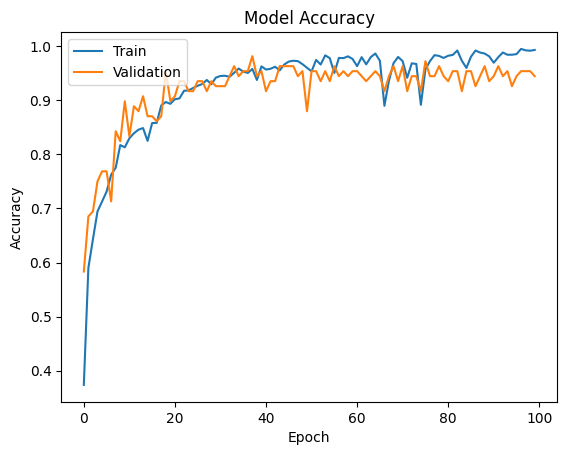

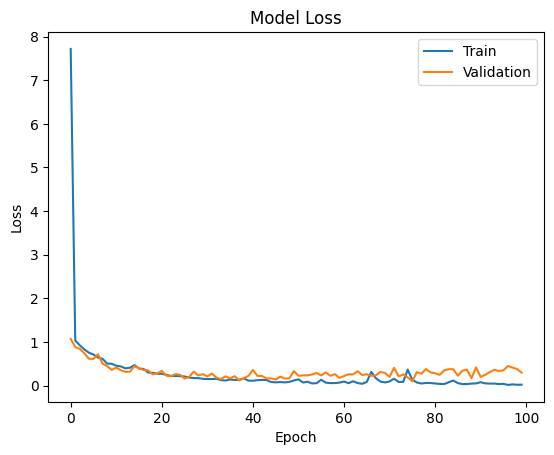

In [24]:
import matplotlib.pyplot as plt


# Plot training and validation accuracy
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
else:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()






